#First line regression
Первая Линейная регрессия

На наборе данных о студентах

В наборе данных рассматриваются ученики прошедшие или провалившие экзамен

Это может стать первым шагом в изучении науки о данных


```
Student data

This notebook analyises pass/fail data for a class

I think it coud be good point for start iin DS
```



## Оглавление
- [Описание данных](#описание-данных)
- [Загрузка данных](#импорты-и-загрузка-данных)
- [Исследовательский анализ данных (EDA)](#исследовательский-анализ-данных-eda)


## Описание данных

Данные взяты из обучающего набора Visual Studio code








In [1]:
#Visual Studio data
#List with Grades
data = [50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 78, 27, 36, 35, 48, 52, 63, 64]
#Now lets have add Study hours
study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]

## Загрузка данных


Часть данных генерируется в ходе подготовки к выполнению основной задачи урока


In [2]:
#DF будет состоять из колонок ['Name','StudyHours','Grade']
#Мы могли бы написать 'Name' руками, или попросить список у GPT, или найти в интернете, но как мы тогда самоутвердимся?

#Устанавливаем библиотеку
!pip install faker

import numpy as np
import pandas as pd
from faker import Faker

"""
Эта функция создает DataFrame с данными о студентах с колонками Name, StudyHours и Grade.

Параметры:
- data_lists: *список списков* - Переменное количество списков, каждый из которых содержит числовые данные одинаковой длины.

Возвращает:
- pd.DataFrame: DataFrame, содержащий сгенерированные данные о студентах.

Исключения:
- ValueError: Если не передано ни одного списка или списки имеют разную длину.

Пример:
>>> study_hours = [10, 15, 20, 25]
>>> data = [85, 90, 78, 92]
>>> students_df = create_student_dataframe(study_hours, grades)
>>> print(students_df.head())
"""
def create_student_dataframe(*data_lists) -> pd.DataFrame:
    if not data_lists:
        raise ValueError("Необходимо передать хотя бы один список данных.")

    data_array = np.array(data_lists)
    fake = Faker('ru_RU')
    names = [fake.first_name() for _ in range(data_array.shape[1])]

    df_students = pd.DataFrame({
        'Name': names,
        'StudyHours': data_array[0],
        'Grade': data_array[1]
    })
    from google.colab import drive
    drive.mount('/content/drive')
    save_file_path = '/content/drive/MyDrive/Colab Notebooks/students_data.csv'
    #df_students.to_csv(save_file_path, index=False)
    return df_students

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.5 MB/s eta 0:00:00


In [3]:
#Пример использования
df_students = create_student_dataframe(study_hours, data)
df_students.head()

Mounted at /content/drive


,Name,StudyHours,Grade
0,Родион,10.00,50.0
1,Андрей,11.50,50.0
2,Фортунат,9.00,47.0
3,Сидор,16.00,97.0
4,Виктория,9.25,49.0


## Исследовательский анализ данных (EDA)


*   describe
*   nan
*   outlier
*   density plot


In [4]:
import pandas as pd

def detect_outliers(df):
    df_c = df.copy()
    # Проходим по всем числовым столбцам DataFrame
    for col in df_c.select_dtypes(include=['number']).columns:
        # Расчёт квартилей и IQR для каждого столбца
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Определение границ выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Добавление нового столбца для каждого числового столбца с результатами
        df_c[f'{col}_outlier'] = df_c[col].apply(lambda x: True if x < lower_bound or x > upper_bound else False)

    return df_c
df_outliers = detect_outliers(df_students)

In [11]:
df_outliers[['Grade_outlier', 'StudyHours_outlier']].apply(pd.Series.value_counts)


,Grade_outlier,StudyHours_outlier
False,22.0,21
True,NaN,1


In [14]:
df_outliers[df_outliers['StudyHours_outlier']==True]

,Name,StudyHours,Grade,StudyHours_outlier,Grade_outlier
5,Боян,1.0,3.0,True,False


       StudyHours      Grade
count   22.000000  22.000000
mean    10.522727  49.545455
std      3.487144  22.165454
min      1.000000   3.000000
25%      9.000000  36.250000
50%     10.000000  49.500000
75%     12.375000  62.750000
max     16.000000  97.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        22 non-null     object 
 1   StudyHours  22 non-null     float64
 2   Grade       22 non-null     float64
 3   Pass        22 non-null     bool   
dtypes: bool(1), float64(2), object(1)
memory usage: 678.0+ bytes

None


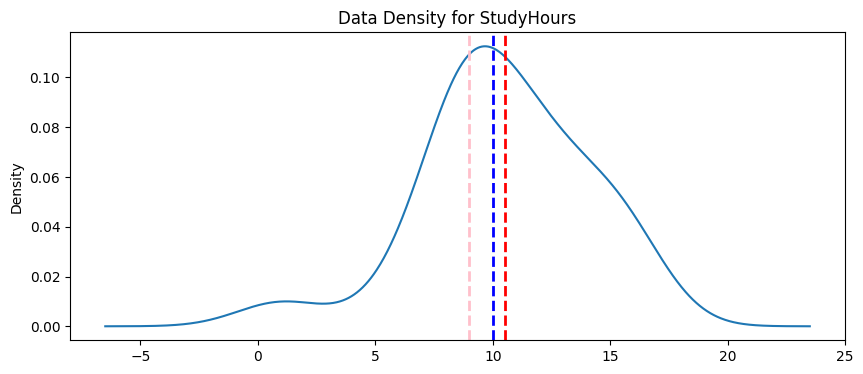

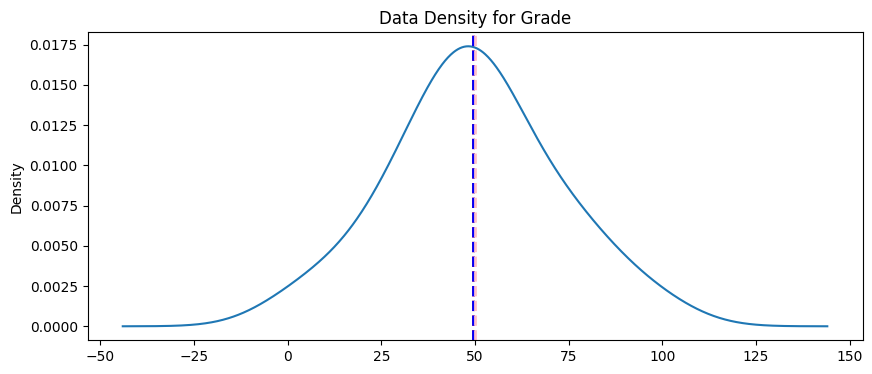

In [28]:
print(df_students.describe())
print(f'\n{df_students.info()}')

def show_density(var_data):
  fig = plt.figure(figsize=(10, 4))
  var_data.plot.density()
  plt.title(f'Data Density for {var_data.name}')
  plt.axvline(x = var_data.mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
  plt.axvline(x = var_data.median(), color = 'blue', linestyle = 'dashed', linewidth = 2)
  plt.axvline(x = var_data.mode()[0], color = 'pink', linestyle = 'dashed', linewidth = 2)
  plt.show()

show_density(df_students.StudyHours)
show_density(df_students.Grade)